# Span Batch Analysis - L2 Block Accumulation

Fetch consecutive singular batches. Singular batches will be stored at `./artifacts/mainnet/batches_v0_cache`, and each filename will be the form of `{l2blocknumber}.json`

For example, If we set `--start=107880000 --end=107881000`, 1000 json files will be generated, having filename from `107880000.json` to `107881000.json`.

In [8]:
!./cmd/span_batch_tester/span_batch_tester fetch --l2 https://op-erigon.goerli.testinprod.io --start=13630000 --end=13631000 --concurrent-requests=10 --out=./artifacts/empty_batches --empty-tx=true

Fetched L2 block:  13630007
Fetched L2 block:  13630002
Fetched L2 block:  13630006
Fetched L2 block:  13630001
Fetched L2 block:  13630009
Fetched L2 block:  13630004
Fetched L2 block:  13630008
Fetched L2 block:  13630003
Fetched L2 block:  13630005
Fetched L2 block:  13630000
Fetched L2 block:  13630011
Fetched L2 block:  13630013
Fetched L2 block:  13630010
Fetched L2 block:  13630014
Fetched L2 block:  13630012
Fetched L2 block:  13630015
Fetched L2 block:  13630017
Fetched L2 block:  13630016
Fetched L2 block:  13630018
Fetched L2 block:  13630019
Fetched L2 block:  13630020
Fetched L2 block:  13630022
Fetched L2 block:  13630023
Fetched L2 block:  13630021
Fetched L2 block:  13630025
Fetched L2 block:  13630028
Fetched L2 block:  13630024
Fetched L2 block:  13630027
Fetched L2 block:  13630026
Fetched L2 block:  13630029
Fetched L2 block:  13630030
Fetched L2 block:  13630033
Fetched L2 block:  13630032
Fetched L2 block:  13630031
Fetched L2 block:  13630037
Fetched L2 block:  1

Merge singular batches.

In [9]:
!./cmd/span_batch_tester/span_batch_tester merge --l2 https://op-erigon.goerli.testinprod.io --start=13630000 --end=13631000 --genesis-timestamp=1673550516 --in=./artifacts/empty_batches --out=./artifacts/empty_merge_result

Merged v0 batches in range [13630000,13631000).


Above command will analyze `start - end` number of batches, Comparing uncompressed size of below two batches:
- For `i` in range  `0` to `start - end - 1`
  - singular batch from number `start` to `start + i`, inclusive.
  - span batch from number `start` to `start + i`, inclusive.

Upper command will make a result json file which has name of the form `{start_number}_{end_number}.json`.

Relation between `L2BlockCount` and (`UncompressedSizeReductionPercent`, `BatchV1sMetadataSizePercent`).

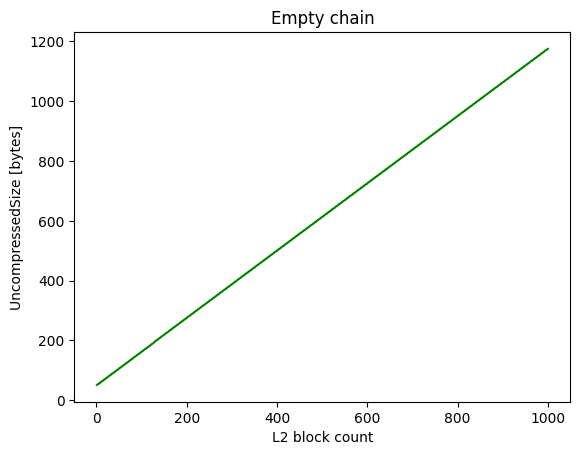

In [32]:
import json
import matplotlib.pyplot as plt

START_BLOCK_NUMBER = 13630000
END_BLOCK_NUMBER = 13631000
CHAIN_NAME = "Empty chain"
FILENAME = f"./artifacts/empty_merge_result/{START_BLOCK_NUMBER}_{END_BLOCK_NUMBER}.json"
CLAMP = 0

Xs, Ys, Zs = [], [], []
with open(FILENAME) as f:
    result = json.load(f)["Result"]
    for i in range(CLAMP, 1000):
        l2_block_count = result[i]["L2BlockCount"]
        Xs.append(l2_block_count)
        uncompressed_size = result[i]["SpanBatchUncompressedSize"]
        Ys.append(uncompressed_size)



fig, ax1 = plt.subplots()
ax1.plot(Xs, Ys, c="green")

ax1.set_xlabel("L2 block count")
ax1.set_ylabel("UncompressedSize [bytes]")

plt.title(CHAIN_NAME)

plt.show()


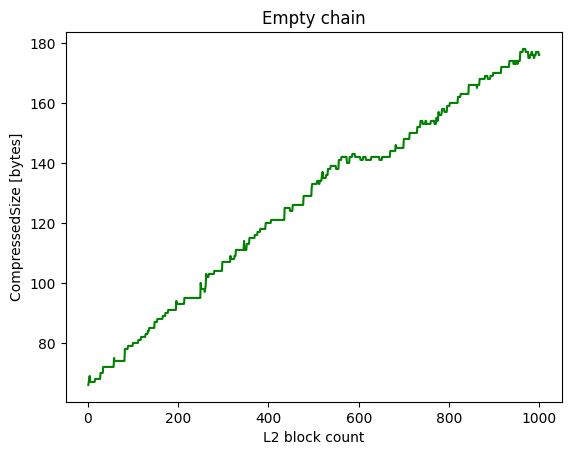

In [40]:
import json
import matplotlib.pyplot as plt

START_BLOCK_NUMBER = 13630000
END_BLOCK_NUMBER = 13631000
CHAIN_NAME = "Empty chain"
FILENAME = f"./artifacts/empty_merge_result/{START_BLOCK_NUMBER}_{END_BLOCK_NUMBER}.json"
CLAMP = 0

Xs, Ys, Zs = [], [], []
with open(FILENAME) as f:
    result = json.load(f)["Result"]
    for i in range(CLAMP, 1000):
        l2_block_count = result[i]["L2BlockCount"]
        Xs.append(l2_block_count)
        compressed_size = result[i]["SpanBatchCompressedSize"]
        Ys.append(compressed_size)

fig, ax1 = plt.subplots()
ax1.plot(Xs, Ys, c="green")

ax1.set_xlabel("L2 block count")
ax1.set_ylabel("CompressedSize [bytes]")

plt.title(CHAIN_NAME)

plt.show()


98.49358974358975


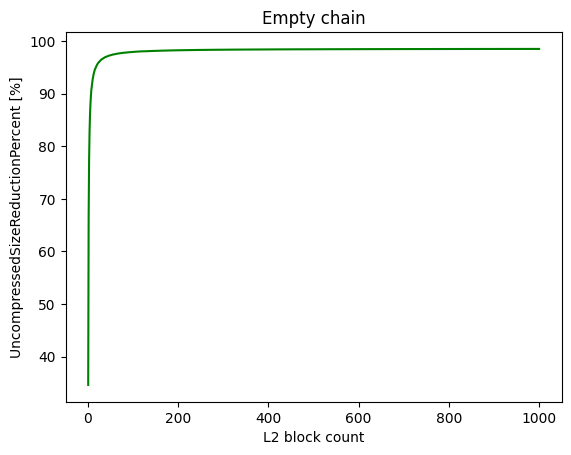

In [49]:
import json
import matplotlib.pyplot as plt

START_BLOCK_NUMBER = 13630000
END_BLOCK_NUMBER = 13631000
CHAIN_NAME = "Empty chain"
FILENAME = f"./artifacts/empty_merge_result/{START_BLOCK_NUMBER}_{END_BLOCK_NUMBER}.json"
CLAMP = 0

Xs, Ys, Zs = [], [], []
with open(FILENAME) as f:
    result = json.load(f)["Result"]
    for i in range(CLAMP, 1000):
        l2_block_count = result[i]["L2BlockCount"]
        Xs.append(l2_block_count)
        uncompressed_reduction_precent = result[i]["UncompressedSizeReductionPercent"]
        Ys.append(uncompressed_reduction_precent)
    print(uncompressed_reduction_precent)


fig, ax1 = plt.subplots()
ax1.plot(Xs, Ys, c="green")

ax1.set_xlabel("L2 block count")
ax1.set_ylabel("UncompressedSizeReductionPercent [%]")

plt.title(CHAIN_NAME)

plt.show()


92.17948717948718


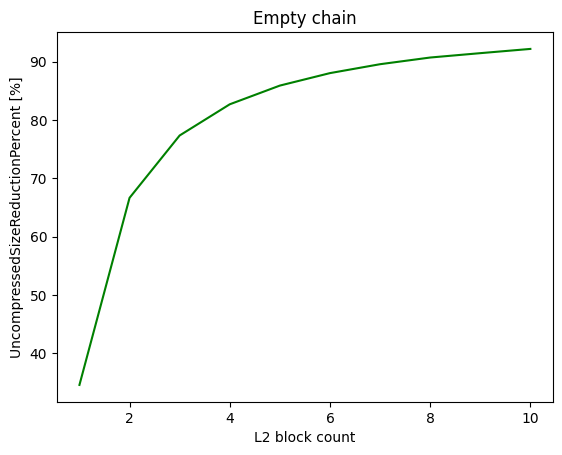

In [50]:
import json
import matplotlib.pyplot as plt

START_BLOCK_NUMBER = 13630000
END_BLOCK_NUMBER = 13631000
CHAIN_NAME = "Empty chain"
FILENAME = f"./artifacts/empty_merge_result/{START_BLOCK_NUMBER}_{END_BLOCK_NUMBER}.json"
CLAMP = 0

Xs, Ys, Zs = [], [], []
with open(FILENAME) as f:
    result = json.load(f)["Result"]
    for i in range(CLAMP, 10):
        l2_block_count = result[i]["L2BlockCount"]
        Xs.append(l2_block_count)
        uncompressed_reduction_precent = result[i]["UncompressedSizeReductionPercent"]
        Ys.append(uncompressed_reduction_precent)
    print(uncompressed_reduction_precent)


fig, ax1 = plt.subplots()
ax1.plot(Xs, Ys, c="green")

ax1.set_xlabel("L2 block count")
ax1.set_ylabel("UncompressedSizeReductionPercent [%]")

plt.title(CHAIN_NAME)

plt.show()


99.57500241475901


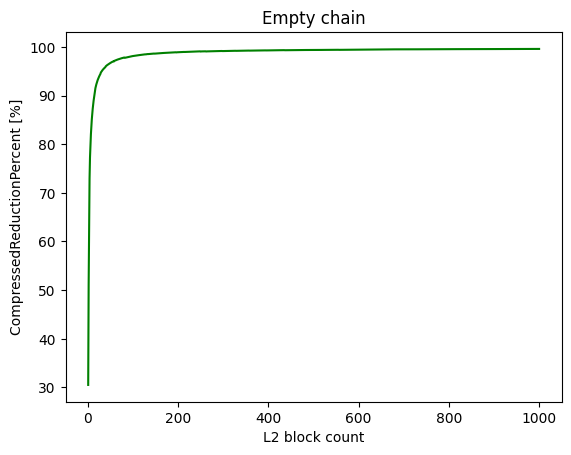

In [51]:
import json
import matplotlib.pyplot as plt

START_BLOCK_NUMBER = 13630000
END_BLOCK_NUMBER = 13631000
CHAIN_NAME = "Empty chain"
FILENAME = f"./artifacts/empty_merge_result/{START_BLOCK_NUMBER}_{END_BLOCK_NUMBER}.json"
CLAMP = 0

Xs, Ys, Zs = [], [], []
with open(FILENAME) as f:
    result = json.load(f)["Result"]
    for i in range(CLAMP, 1000):
        l2_block_count = result[i]["L2BlockCount"]
        Xs.append(l2_block_count)
        compressed_reduction_precent = result[i]["CompressedReductionPercent"]
        Ys.append(compressed_reduction_precent)
    print(compressed_reduction_precent)


fig, ax1 = plt.subplots()
ax1.plot(Xs, Ys, c="green")

ax1.set_xlabel("L2 block count")
ax1.set_ylabel("CompressedReductionPercent [%]")

plt.title(CHAIN_NAME)

plt.show()


86.27049180327869


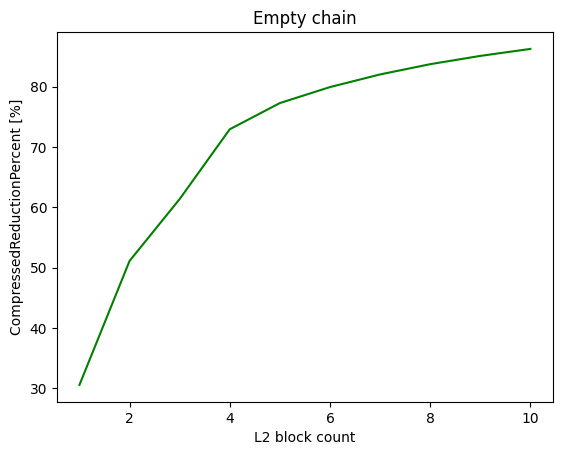

In [52]:
import json
import matplotlib.pyplot as plt

START_BLOCK_NUMBER = 13630000
END_BLOCK_NUMBER = 13631000
CHAIN_NAME = "Empty chain"
FILENAME = f"./artifacts/empty_merge_result/{START_BLOCK_NUMBER}_{END_BLOCK_NUMBER}.json"
CLAMP = 0

Xs, Ys, Zs = [], [], []
with open(FILENAME) as f:
    result = json.load(f)["Result"]
    for i in range(CLAMP, 10):
        l2_block_count = result[i]["L2BlockCount"]
        Xs.append(l2_block_count)
        compressed_reduction_precent = result[i]["CompressedReductionPercent"]
        Ys.append(compressed_reduction_precent)
    print(compressed_reduction_precent)


fig, ax1 = plt.subplots()
ax1.plot(Xs, Ys, c="green")

ax1.set_xlabel("L2 block count")
ax1.set_ylabel("CompressedReductionPercent [%]")

plt.title(CHAIN_NAME)

plt.show()


14.97872340425532


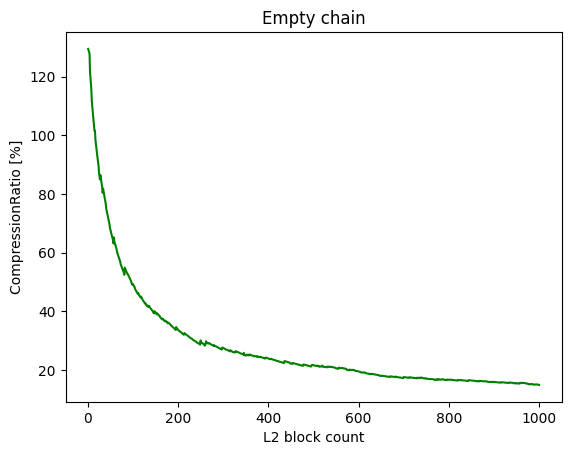

In [57]:
import json
import matplotlib.pyplot as plt

START_BLOCK_NUMBER = 13630000
END_BLOCK_NUMBER = 13631000
CHAIN_NAME = "Empty chain"
FILENAME = f"./artifacts/empty_merge_result/{START_BLOCK_NUMBER}_{END_BLOCK_NUMBER}.json"
CLAMP = 0

Xs, Ys, Zs = [], [], []
with open(FILENAME) as f:
    result = json.load(f)["Result"]
    for i in range(CLAMP, 1000):
        l2_block_count = result[i]["L2BlockCount"]
        Xs.append(l2_block_count)
        compression_ratio = result[i]["SpanBatchCompressedSize"] / result[i]["SpanBatchUncompressedSize"] * 100
        Ys.append(compression_ratio)
    print(compression_ratio)


fig, ax1 = plt.subplots()
ax1.plot(Xs, Ys, c="green")

ax1.set_xlabel("L2 block count")
ax1.set_ylabel("CompressionRatio [%]")

plt.title(CHAIN_NAME)

plt.show()
